In [9]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import requests
import hvplot.pandas

In [10]:
#load csvs and read them as a dataframe
nhl_draft=Path("Resources/nhldraft.csv")
nhl_draft_df= pd.read_csv(nhl_draft)

c=Path("Resources/countries.csv")
c_df=pd.read_csv(c)




In [11]:
#locking the columns with the info I woud like to keep
nhl_draft_n = nhl_draft_df.loc[:, ["id", "year", "team", "player", "nationality"]]


In [12]:
#merging the nhldraft dataframe with the c data frame that had the lat and long 
merge_df=pd.merge(left=nhl_draft_n,right=c_df,left_on="nationality", right_on="country")
merge_df


,id,year,team,player,nationality,country,latitude,longitude,name
0,1,2022,Montreal Canadiens,Juraj Slafkovsky,SK,SK,48.669026,19.699024,Slovakia
1,2,2022,New Jersey Devils,Simon Nemec,SK,SK,48.669026,19.699024,Slovakia
2,26,2022,Montreal Canadiens,Filip Mesar,SK,SK,48.669026,19.699024,Slovakia
3,63,2022,New York Rangers,Adam Sykora,SK,SK,48.669026,19.699024,Slovakia
4,185,2022,Minnesota Wild,Servac Petrovsky,SK,SK,48.669026,19.699024,Slovakia
...,...,...,...,...,...,...,...,...,...
12240,7943,1989,Washington Capitals,Olaf Kolzig,ZA,ZA,-30.559482,22.937506,South Africa
12241,9783,1982,Detroit Red Wings,Claude Vilgrain,HT,HT,18.971187,-72.285215,Haiti
12242,10745,1977,Montreal Canadiens,Rod Langway,TW,TW,23.697810,120.960515,Taiwan
12243,11109,1975,Atlanta Flames,Willi Plett,PY,PY,-23.442503,-58.443832,Paraguay


In [13]:
#keeping the year, nationality, lat, and long
merge_df= merge_df.loc[:, ["id", "year", "nationality","latitude", "longitude"]]
merge_df.head()

,id,year,nationality,latitude,longitude
0,1,2022,SK,48.669026,19.699024
1,2,2022,SK,48.669026,19.699024
2,26,2022,SK,48.669026,19.699024
3,63,2022,SK,48.669026,19.699024
4,185,2022,SK,48.669026,19.699024


In [14]:
#created a dataframe for each decades
df_60_to_70 = merge_df[(merge_df["year"] >= 1960) & (merge_df["year"] <= 1969)]
df_70_to_80 = merge_df[(merge_df["year"] >= 1970) & (merge_df["year"] <= 1979)]
df_80_to_90 = merge_df[(merge_df["year"] >= 1980) & (merge_df["year"] <= 1989)]
df_90_to_2000 = merge_df[(merge_df["year"] >= 1990) & (merge_df["year"] <= 1999)]
df_2000_to_2010 = merge_df[(merge_df["year"] >= 2000) & (merge_df["year"] <= 2009)]
df_2010_to_2020 = merge_df[(merge_df["year"] >= 2010) & (merge_df["year"] <= 2019)]

In [15]:
#2010s 

drop_duplicate2010s=df_2010_to_2020.drop_duplicates("nationality",keep="first")
drop_duplicate2010s

#Delete columns 

#del drop_duplicate2010s['id']
#del drop_duplicate2010s['year']

,id,year,nationality,latitude,longitude
9,753,2019,SK,48.669026,19.699024
317,665,2019,US,37.090240,-95.712891
3044,667,2019,CA,56.130366,-106.346771
9385,672,2019,SE,60.128161,18.643501
10126,733,2019,CZ,49.817492,15.472962
10587,1970,2013,AT,47.516231,14.550072
10679,674,2019,RU,61.524010,105.318756
11369,666,2019,FI,61.924110,25.748151
11828,871,2019,CH,46.818188,8.227512
11905,670,2019,DE,51.165691,10.451526


In [16]:
#2010s Map
#merge both data frame to have the lat and long
df_2010_to_2020_complete= pd.DataFrame(df_2010_to_2020["nationality"].value_counts())
merge_df_2010_to_2020=pd.merge(df_2010_to_2020_complete,drop_duplicate2010s, on="nationality", how="left")

#plot it
map_plot_3 = merge_df_2010_to_2020.hvplot.points("longitude", 
                                      "latitude", 
                                      geo = True,
                                      color = "nationality",
                                      alpha = 0.9,
                                      size = "count",
                                      tiles = "OSM", 
                                      frame_width= 800,
                                      frame_height=600,
                                      title="NHL Draft Count by Country from 2010-2020"
                                     )

#Save 
hvplot.save(map_plot_3, 'Output_files/Elodie/2010s.html')
# Display the map
map_plot_3



c:\Users\HP\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\HP\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\HP\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\HP\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\HP\anaconda

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (nationality,count)

In [17]:
#1960 Drop Duplicate
drop_duplicate1960s=df_60_to_70.drop_duplicates("nationality",keep="first")
drop_duplicate1960s

#Delete columns 

del drop_duplicate1960s['id']
del drop_duplicate1960s['year']

In [18]:
#1960s
df_1960_to_1970_complete= pd.DataFrame(df_60_to_70["nationality"].value_counts())
merge_df_1960_to_1970=pd.merge(df_1960_to_1970_complete,drop_duplicate1960s, on="nationality", how="left")

#plot it
map_plot_2 = merge_df_1960_to_1970.hvplot.points("longitude", 
                                      "latitude", 
                                      geo = True,
                                      color = "nationality",
                                      alpha = 0.9,
                                      size = "count",
                                      tiles = "OSM", 
                                      frame_width= 800,
                                      frame_height=600,
                                      title="NHL Draft Count by Country from 1960-1970"
                                     )
#Save 
hvplot.save(map_plot_2, 'Output_files/Elodie/1960s.html')
# Display the map
map_plot_2




c:\Users\HP\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\HP\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\HP\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\HP\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\HP\anaconda

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (nationality,count)

In [19]:

#2000s
drop_duplicate2000s=df_2000_to_2010.drop_duplicates("nationality",keep="first")
drop_duplicate2000s

#Delete columns 

del drop_duplicate2000s['id']
del drop_duplicate2000s['year']

In [20]:
df_2000_to_2010_complete= pd.DataFrame(df_2000_to_2010["nationality"].value_counts())
df_2000_to_2010_complete

,count
nationality,
CA,1079
US,563
RU,208
SE,183
CZ,152
FI,137
SK,69
CH,30
DE,25


In [21]:
#merge both data frame to have the lat and long
merge_df_2000_to_2010=pd.merge(df_2000_to_2010_complete,drop_duplicate2000s, on="nationality", how="left")
merge_df_2000_to_2010.head()

,nationality,count,latitude,longitude
0,CA,1079,56.130366,-106.346771
1,US,563,37.090240,-95.712891
2,RU,208,61.524010,105.318756
3,SE,183,60.128161,18.643501
4,CZ,152,49.817492,15.472962


In [22]:
# Configure the map plot
map_plot_1 = merge_df_2000_to_2010.hvplot.points("longitude", 
                                      "latitude", 
                                      geo = True,
                                      color = "nationality",
                                      alpha = 0.9,
                                      size = "count",
                                      tiles = "OSM", 
                                      frame_width= 800,
                                      frame_height=600,
                                      title="NHL Draft Count by Country from 2000-2010"
                                     )
#Save 
hvplot.save(map_plot_1, 'Output_files/Elodie/2000s.html')
# Display the map
map_plot_1

c:\Users\HP\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\HP\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\HP\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\HP\anaconda3\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\HP\anaconda

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (nationality,count)

In [23]:
#preview the original dataframe to create a new one below
nhl_draft_n

,id,year,team,player,nationality
0,1,2022,Montreal Canadiens,Juraj Slafkovsky,SK
1,2,2022,New Jersey Devils,Simon Nemec,SK
2,3,2022,Arizona Coyotes,Logan Cooley,US
3,4,2022,Seattle Kraken,Shane Wright,CA
4,5,2022,Philadelphia Flyers,Cutter Gauthier,SE
...,...,...,...,...,...
12245,12246,1963,Toronto Maple Leafs,Jim McKenny,CA
12246,12247,1963,Montreal Canadiens,Glen Shirton,CA
12247,12248,1963,Boston Bruins,Jim Blair,CA
12248,12249,1963,New York Rangers,Campbell Alleson,CA


In [24]:
#create a dataframe to see the nhl draft count per country
nhl_draft_df2 = nhl_draft_df.loc[:, ["id", "year", "team", "player", "nationality"]]
nhl_draft_df2
#Extract the decade from the year column
nhl_draft_df2['decade'] = (nhl_draft_df2['year'] // 10) * 10

#4 loop to get the count 
nationalities = ['SK', 'US', 'CA', 'SE', 'CZ', 'AT', 'RU', 'FI', 'CH', 'DE', 'LV',
       'PL', 'BY', 'GB', 'KZ', 'NO', 'UA', 'UZ', 'DK', 'AU', 'TH', 'JM',
       'FR', 'SI', 'BE', 'NL', 'CN', 'LT', 'IT', 'NG', 'EE', 'JP',
       'ME', 'HU', 'YU', 'BS', 'BR', 'TZ', 'BN', 'KR', 'ZA', 'SU', 'HT',
       'TW', 'PY', 'VE']
result_dict = {}

for nationality in nationalities:
   
    counts_per_decades = nhl_draft_df2[nhl_draft_df2["nationality"] == nationality].groupby("decade").size()
    result_dict[nationality] = counts_per_decades
    # Convert the result to a DataFrame
result_df2 = pd.DataFrame(result_dict)

#replace the NAN to O
result_df2.fillna(0, inplace=True)

# Display the resulting DataFrame
result_df2.head(7)

,SK,US,CA,SE,CZ,AT,RU,FI,CH,DE,...,BR,TZ,BN,KR,ZA,SU,HT,TW,PY,VE
decade,,,,,,,,,,,,,,,,,,,,,
1960,0.0,6,197,0.0,0.0,0.0,0.0,1,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1970,1.0,240,1392,28.0,2.0,0.0,2.0,11,2.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1980,12.0,647,1443,117.0,67.0,0.0,35.0,71,0.0,10,...,1.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0
1990,53.0,458,1319,145.0,162.0,5.0,256.0,101,10.0,14,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2000,69.0,563,1079,183.0,152.0,7.0,208.0,137,30.0,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010,22.0,574,829,245.0,73.0,2.0,145.0,132,25.0,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020,9.0,151,239,82.0,23.0,5.0,78.0,44,6.0,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#reset index to scatter plot the datafame
result_df3 = result_df2.reset_index()
result_df3.to_csv("Output_files/Elodie/PerNationality.csv")

In [26]:
#print the actual name of the country codes based on the country dataframe to add to the legend of the scatter plot
SK = c_df.loc[c_df["country"] == "SK", "name"].tolist()
US=c_df.loc[c_df["country"] == "US", "name"].tolist()
CA=c_df.loc[c_df["country"] == "CA", "name"].tolist()
SE=c_df.loc[c_df["country"] == "SE", "name"].tolist()
CZ=c_df.loc[c_df["country"] == "CZ", "name"].tolist()
AT=c_df.loc[c_df["country"] == "AT", "name"].tolist()
RU=c_df.loc[c_df["country"] == "RU", "name"].tolist()
FI=c_df.loc[c_df["country"] == "FI", "name"].tolist()
CH=c_df.loc[c_df["country"] == "CH", "name"].tolist()
BR=c_df.loc[c_df["country"] == "BR", "name"].tolist()

print(SK,US,CA,SE,CZ,AT,RU,FI,CH,BR)


['Slovakia'] ['United States'] ['Canada'] ['Sweden'] ['Czech Republic'] ['Austria'] ['Russia'] ['Finland'] ['Switzerland'] ['Brazil']


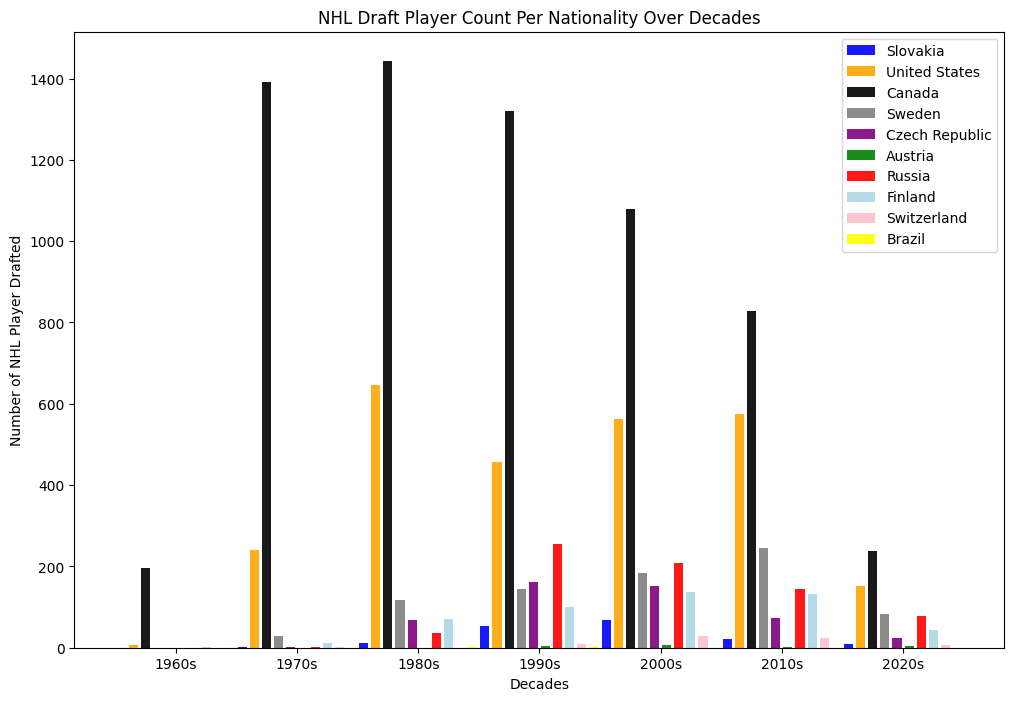

In [27]:


# Example data (replace this with your actual data)
decades = result_df3["decade"]
countries = ["SK", "US", "CA", "SE", "CZ", "AT", "RU", "FI", "CH", "BR"]

# Set up colors for each country
colors = ["blue", "orange", "black", "gray", "purple", "green", "red", "lightblue", "pink", "yellow"]

# Increase the width of the bars
bar_width = 0.9  
bar_spacing = 0.3 

# Set figure size before plotting
plt.figure(figsize=(12, 8))

# Plotting grouped bar chart
for i, country in enumerate(countries):
    plt.bar(
        x=np.arange(len(decades)) * (len(countries) * (bar_width + bar_spacing)) + i * (bar_width + bar_spacing),  # Adding an offset for each country
        height=result_df3[country],
        width=bar_width,  # Adjust the width based on your preference
        color=colors[i],
        alpha=0.9,
        label=country
    )

# Set legend with country names
plt.legend(['Slovakia', 'United States','Canada', 'Sweden','Czech Republic','Austria','Russia','Finland','Switzerland','Brazil'])

# Add labels and title
plt.xlabel("Decades")
plt.ylabel("Number of NHL Player Drafted")
plt.title("NHL Draft Player Count Per Nationality Over Decades")

# Set x-axis ticks at the center of each group
tick_positions = np.arange(len(decades)) * (len(countries) * (bar_width + bar_spacing)) + (len(countries) - 1) * (bar_width + bar_spacing) / 2
#add s to indicate decades (1960s)
plt.xticks(tick_positions, [f"{decade}s" for decade in decades])
#save
plt.savefig("Output_files/Elodie/NHLDRAFTCOUNT.png")
plt.show()


In [28]:
# For Lena-curious about american draft picks from 1988 to 2022
lena_after_1988 = merge_df[(merge_df["year"] >= 1988) & (merge_df["nationality"] == "US")].shape[0]

print(lena_after_1988)


1904


In [29]:
# For Lena-# For Lena-curious about american draft picks before 1988
lena_before_1988 = merge_df[(merge_df["year"] < 1988) & (merge_df["nationality"] == "US")].shape[0]

print(lena_before_1988)

735


In [30]:
lena={"American Draft Picks Count From 1988 to 2022":lena_after_1988, "American Draft Picks Count Before 1988":lena_before_1988 }
# Create a DataFrame from the dictionary
lena_df = pd.DataFrame.from_dict(lena, orient='index', columns=['Count'])
Save=lena_df.to_csv("Resources/leana_request.csv")
lena_df

,Count
American Draft Picks Count From 1988 to 2022,1904
American Draft Picks Count Before 1988,735
